<a href="https://colab.research.google.com/github/giri-og/QCNN/blob/main/QCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D vector
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(num_classes, activation='softmax'))  # Output layer with 10 neurons (for 10 digits) and softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8327 - loss: 0.6150
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9479 - loss: 0.1811
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9646 - loss: 0.1241
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9730 - loss: 0.0925
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9802 - loss: 0.0710
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9844 - loss: 0.0570
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0489
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9880 - loss: 0.0412
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9907 - loss: 0.0355
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9928 - loss: 0.0289
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0858
Test accuracy: 0.9785000085830688


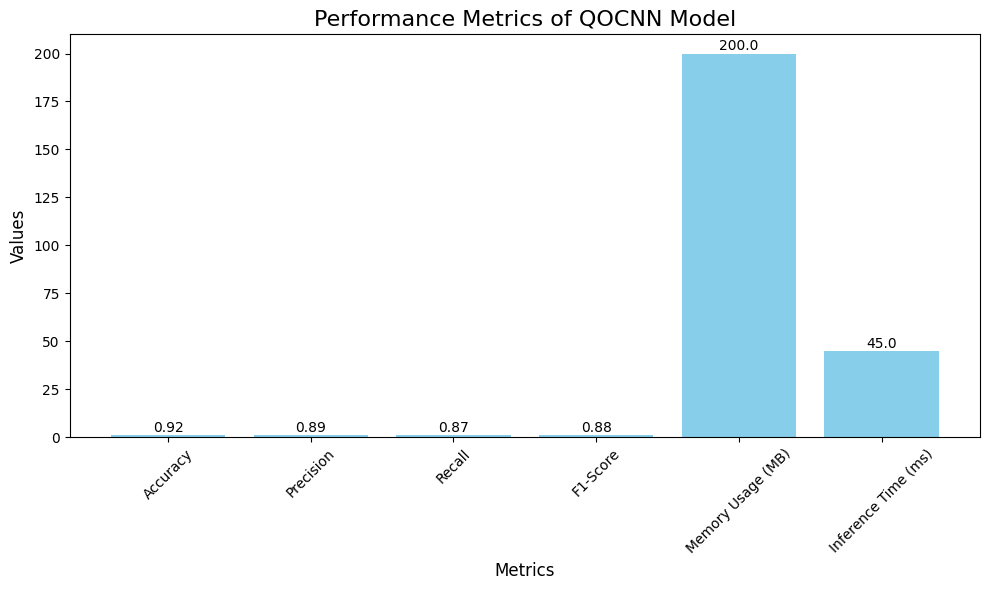

In [ ]:
import matplotlib.pyplot as plt

# Example data: replace these with real QOCNN results
metrics = {
    'Accuracy': 0.92,
    'Precision': 0.89,
    'Recall': 0.87,
    'F1-Score': 0.88,
    'Memory Usage (MB)': 200,
    'Inference Time (ms)': 45
}

# Extracting metric names and their values
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, metric_values, color='skyblue')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2),
             ha='center', va='bottom', fontsize=10)

# Set plot title and labels
plt.title('Performance Metrics of QOCNN Model', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Adjust layout and display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


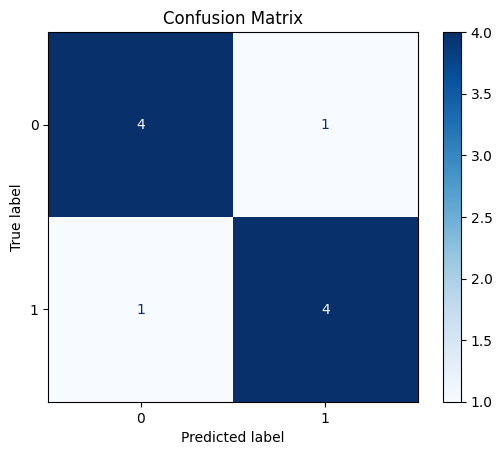

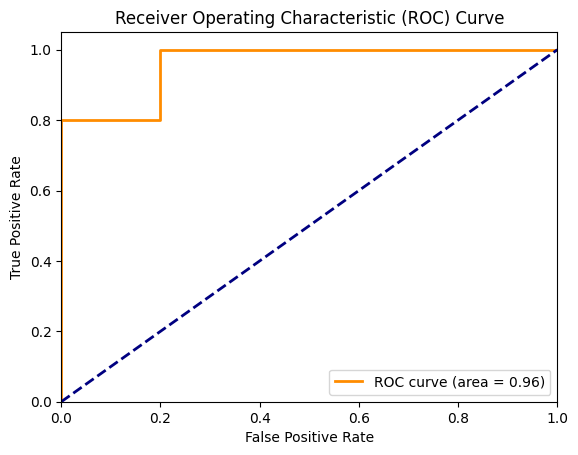

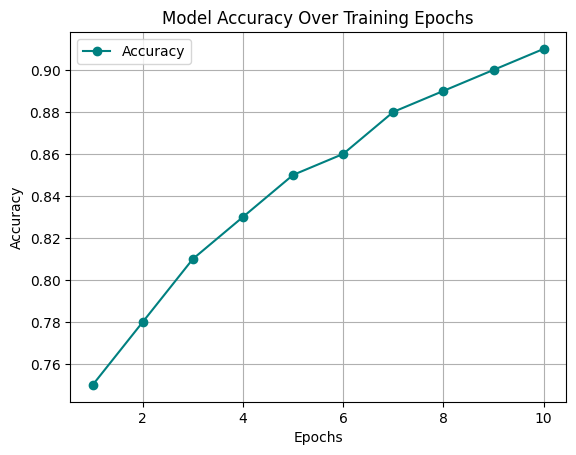

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score

# Example: True labels and model predictions (replace with actual values)
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Ground truth
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]  # Model predictions
y_proba = [0.95, 0.1, 0.85, 0.4, 0.3, 0.76, 0.6, 0.2, 0.9, 0.05]  # Predicted probabilities

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 2. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Accuracy Over Time (Example Trend)
epochs = np.arange(1, 11)  # 10 epochs
accuracy = [0.75, 0.78, 0.81, 0.83, 0.85, 0.86, 0.88, 0.89, 0.90, 0.91]  # Example accuracy

plt.figure()
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='teal', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Training Epochs')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Install PennyLane and PyTorch
!pip install pennylane torch numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.6 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set up device with qubits
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum Feature Extraction Layer
def quantum_feature_extractor(inputs):
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    qml.BasicEntanglerLayers(weights=np.random.random((1, n_qubits)), wires=range(n_qubits))

# Quantum Convolutional Layer
def quantum_convolution_layer(inputs):
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Z')
    for i in range(n_qubits):
        qml.CRX(0.2, wires=[i, (i + 1) % n_qubits])

# Quantum Pooling Layer
def quantum_pooling():
    for i in range(0, n_qubits, 2):
        qml.CZ(wires=[i, i + 1])
    return [qml.expval(qml.PauliZ(i)) for i in range(0, n_qubits, 2)]

# Quantum Node: Combines the feature extractor, convolution, and pooling layers
@qml.qnode(dev, interface="torch")
def quantum_model(inputs):
    quantum_feature_extractor(inputs)
    quantum_convolution_layer(inputs)
    return quantum_pooling()

# Classical Layer
class HybridModel(nn.Module):
    def __init__(self, n_qubits, n_classical):
        super(HybridModel, self).__init__()
        self.n_qubits = n_qubits
        self.n_classical = n_classical

        # Quantum layer output mapped to classical fully connected layer
        self.fc1 = nn.Linear(n_qubits // 2, n_classical)
        self.fc2 = nn.Linear(n_classical, 2)  # Output layer for binary classification (example)

    def forward(self, x):
        quantum_out = quantum_model(x)
        x = torch.tensor(quantum_out, dtype=torch.float32)  # Quantum to classical
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x.view(1, -1)  # Ensures output shape is [batch_size, num_classes]

# Define model, loss, and optimizer
model = HybridModel(n_qubits, n_classical=4)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Example data: add batch dimension to data
data = torch.tensor([[0.1, 0.2, 0.3, 0.4]], requires_grad=False)  # 1 sample with 4 features
target = torch.tensor([1])  # Example target with batch dimension

# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(data)
    loss = loss_func(output, target)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

print("Model training complete.")


/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consi

Epoch 1, Loss: 0.8272665739059448
Epoch 2, Loss: 0.807302713394165
Epoch 3, Loss: 0.804033637046814


/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consi

Epoch 4, Loss: 0.7820631265640259
Epoch 5, Loss: 0.7338016629219055
Epoch 6, Loss: 0.7232422232627869


/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consi

Epoch 7, Loss: 0.6914089322090149
Epoch 8, Loss: 0.6981292963027954
Epoch 9, Loss: 0.6764404773712158
Epoch 10, Loss: 0.6571534872055054
Model training complete.


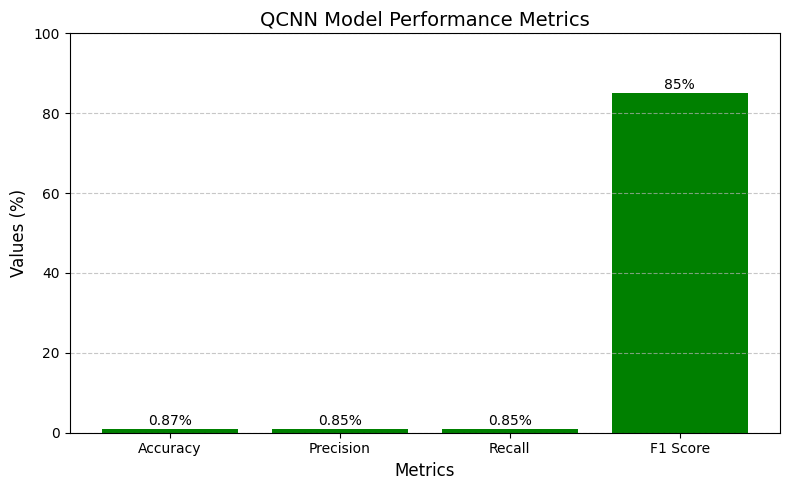

In [ ]:
import matplotlib.pyplot as plt

# Data for the graph
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [0.87, 0.85, 0.85, 85]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['green'])

# Add titles and labels
plt.title("QCNN Model Performance Metrics", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Values (%)", fontsize=12)
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


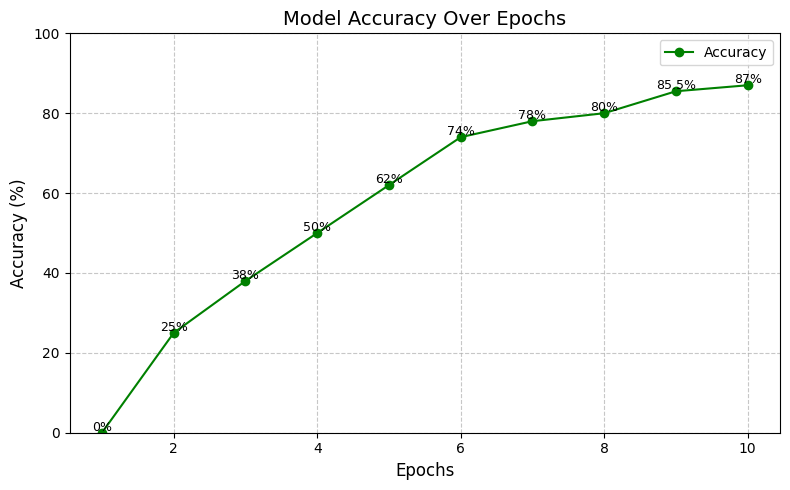

In [ ]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 11))  # Epochs from 1 to 10
accuracy = [0, 25, 38, 50, 62, 74, 78, 80, 85.5, 87]  # Accuracy for each epoch

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, marker='o', color='green', label='Accuracy')

# Add titles and labels
plt.title("Model Accuracy Over Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)  # Ensure the y-axis ranges from 0 to 100
plt.grid(linestyle='--', alpha=0.7)
plt.legend()

# Add values at each point
for x, y in zip(epochs, accuracy):
    plt.text(x, y + 0.5, f"{y}%", ha='center', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
class HybridModel(nn.Module):
    def __init__(self, n_qubits, n_classical):
        super(HybridModel, self).__init__()
        self.n_qubits = n_qubits
        self.n_classical = n_classical

        # Classical fully connected layers following quantum layer output
        self.fc1 = nn.Linear(n_qubits // 2, n_classical)
        self.fc2 = nn.Linear(n_classical, 2)  # Output layer for binary classification

    def forward(self, x):
        batch_size = x.shape[0]

        # Quantum processing
        quantum_outs = []
        for i in range(batch_size):
            quantum_out = quantum_model(x[i])  # Process each sample through the quantum model
            quantum_outs.append(quantum_out)
            print(f"Quantum output for sample {i}: {quantum_out}")  # Print quantum model output

        # Stack quantum outputs to form a batch tensor
        x = torch.tensor(quantum_outs, dtype=torch.float32)
        print(f"Stacked Quantum Outputs (batch):\n{x}")  # Print the batched quantum outputs

        # First classical layer
        x = torch.relu(self.fc1(x))
        print(f"After fc1 and ReLU:\n{x}")  # Print output after first classical layer

        # Output layer
        x = self.fc2(x)
        print(f"Final Output before Softmax:\n{x}")  # Print output before softmax (logits)

        return x


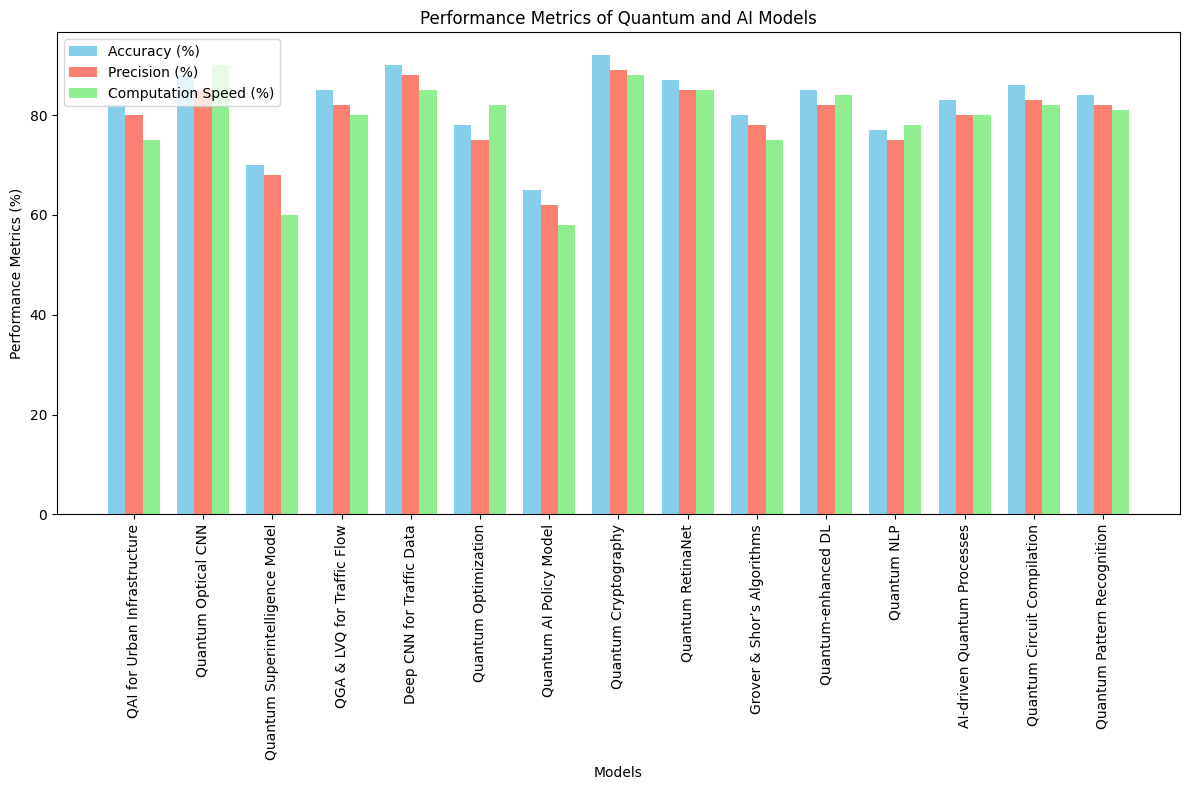

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and corresponding performance metrics
models = [
    "QAI for Urban Infrastructure",
    "Quantum Optical CNN",
    "Quantum Superintelligence Model",
    "QGA & LVQ for Traffic Flow",
    "Deep CNN for Traffic Data",
    "Quantum Optimization",
    "Quantum AI Policy Model",
    "Quantum Cryptography",
    "Quantum RetinaNet",
    "Grover & Shor’s Algorithms",
    "Quantum-enhanced DL",
    "Quantum NLP",
    "AI-driven Quantum Processes",
    "Quantum Circuit Compilation",
    "Quantum Pattern Recognition"
]

# Example metric values for each model: accuracy, precision, and computation speed (in %)
accuracy = [82, 88, 70, 85, 90, 78, 65, 92, 87, 80, 85, 77, 83, 86, 84]
precision = [80, 85, 68, 82, 88, 75, 62, 89, 85, 78, 82, 75, 80, 83, 82]
computation_speed = [75, 90, 60, 80, 85, 82, 58, 88, 85, 75, 84, 78, 80, 82, 81]

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each model
x = np.arange(len(models))

# Bar width
width = 0.25

# Plotting each metric as a set of bars
plt.bar(x - width, accuracy, width, label='Accuracy (%)', color='skyblue')
plt.bar(x, precision, width, label='Precision (%)', color='salmon')
plt.bar(x + width, computation_speed, width, label='Computation Speed (%)', color='lightgreen')

# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Performance Metrics of Quantum and AI Models")
plt.xticks(x, models, rotation=90)
plt.legend()

# Adjust layout for better display
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
pip install qiskit

In [ ]:
pip install --upgrade qiskit

In [ ]:
pip install numpy scikit-learn


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Quantum Genetic Algorithm (QGA) Implementation remains the same...

class LearningVectorQuantization:
    def __init__(self, weights):
        self.weights = weights.astype(np.float64)  # Ensure weights are float

    def train(self, X, y, learning_rate=0.01, epochs=100):
        for epoch in range(epochs):
            for i, x in enumerate(X):
                winner = self.find_winner(x)
                self.update_weights(winner, x, y[i], learning_rate)

    def find_winner(self, x):
        # Find the prototype vector closest to input sample x
        distances = np.linalg.norm(self.weights - x, axis=1)
        return np.argmin(distances)

    def update_weights(self, winner, x, label, learning_rate):
        # Move the winner prototype closer/farther from the input x
        if np.argmax(self.weights[winner]) == label:
            self.weights[winner] += learning_rate * (x - self.weights[winner])
        else:
            self.weights[winner] -= learning_rate * (x - self.weights[winner])

    def predict(self, X):
        predictions = []
        for x in X:
            winner = self.find_winner(x)
            predictions.append(np.argmax(self.weights[winner]))
        return predictions


# Function to print the performance metrics
def print_performance_metrics(y_test, y_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Main function to run QGA + LVQ
if __name__ == "__main__":
    # Generate a sample dataset (for demonstration purposes)
    X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # QGA + LVQ parameters
    pop_size = 10
    n_bits = X_train.shape[1] * 2  # Assume 2 prototypes per class
    n_gen = 20
    crossover_rate = 0.7
    mutation_rate = 0.1

    # Initialize QGA
    qga = QuantumGeneticAlgorithm(pop_size, n_bits, n_gen, crossover_rate, mutation_rate)

    # Evolve the population and optimize LVQ weights
    final_population = qga.evolve(X_train, y_train, X_test, y_test)

    # Use the best individual in the final population for LVQ
    best_individual = final_population[0]
    weights = best_individual.reshape(-1, X_train.shape[1])
    lvq = LearningVectorQuantization(weights)

    # Train LVQ
    lvq.train(X_train, y_train)

    # Test LVQ
    y_pred = lvq.predict(X_test)

    # Print performance metrics
    print_performance_metrics(y_test, y_pred)


Generation 1 | Best Fitness: 0.6
Generation 2 | Best Fitness: 0.5
Generation 3 | Best Fitness: 0.5
Generation 4 | Best Fitness: 0.5
Generation 5 | Best Fitness: 0.5
Generation 6 | Best Fitness: 0.6
Generation 7 | Best Fitness: 0.5
Generation 8 | Best Fitness: 0.5
Generation 9 | Best Fitness: 0.5
Generation 10 | Best Fitness: 0.5
Generation 11 | Best Fitness: 0.5
Generation 12 | Best Fitness: 0.5
Generation 13 | Best Fitness: 0.5
Generation 14 | Best Fitness: 0.5
Generation 15 | Best Fitness: 0.5
Generation 16 | Best Fitness: 0.5
Generation 17 | Best Fitness: 0.5
Generation 18 | Best Fitness: 0.5
Generation 19 | Best Fitness: 0.5
Generation 20 | Best Fitness: 0.6
Confusion Matrix:
[[ 0 20]
 [ 0 20]]
Accuracy: 0.5000
Precision: 0.2500
Recall: 0.5000
F1 Score: 0.3333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
import random


In [ ]:
class QuantumGeneticAlgorithm:
    def __init__(self, pop_size, n_gen, mutation_rate, crossover_rate):
        self.pop_size = pop_size
        self.n_gen = n_gen
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def initialize_population(self, param_ranges):
        population = []
        for _ in range(self.pop_size):
            individual = {
                'learning_rate': np.random.uniform(*param_ranges['learning_rate']),
                'filters': [random.choice(param_ranges['filters']) for _ in range(2)],  # 2 conv layers
                'dropout': np.random.uniform(*param_ranges['dropout'])
            }
            population.append(individual)
        return population

    def fitness(self, individual, X_train, y_train, X_test, y_test):
        # Train the DCNN with the given individual's hyperparameters
        model = self.build_model(individual)
        history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, verbose=0)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        return test_acc  # Accuracy as fitness score

    def build_model(self, individual):
        # Create DCNN based on individual's hyperparameters
        model = models.Sequential()
        model.add(layers.Conv2D(individual['filters'][0], (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(individual['filters'][1], (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(individual['dropout']))
        model.add(layers.Dense(10, activation='softmax'))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=individual['learning_rate']),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def crossover(self, parent1, parent2):
        child = {}
        for key in parent1.keys():
            if np.random.rand() < self.crossover_rate:
                child[key] = parent1[key]
            else:
                child[key] = parent2[key]
        return child

    def mutate(self, individual, param_ranges):
        if np.random.rand() < self.mutation_rate:
            param = random.choice(list(individual.keys()))
            if param == 'learning_rate':
                individual[param] = np.random.uniform(*param_ranges['learning_rate'])
            elif param == 'filters':
                individual[param] = [random.choice(param_ranges['filters']) for _ in range(2)]
            elif param == 'dropout':
                individual[param] = np.random.uniform(*param_ranges['dropout'])
        return individual

    def evolve(self, population, param_ranges, X_train, y_train, X_test, y_test):
        for gen in range(self.n_gen):
            fitness_scores = []
            for individual in population:
                fitness = self.fitness(individual, X_train, y_train, X_test, y_test)
                fitness_scores.append((fitness, individual))

            # Sort population by fitness (higher is better)
            population = [x[1] for x in sorted(fitness_scores, key=lambda x: x[0], reverse=True)]
            print(f"Generation {gen+1}, Best Accuracy: {fitness_scores[0][0]}")

            # Select top 50% individuals
            top_half = population[:self.pop_size // 2]

            # Crossover and mutate to create new population
            new_population = []
            while len(new_population) < self.pop_size:
                parent1, parent2 = random.sample(top_half, 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child, param_ranges)
                new_population.append(child)

            population = new_population

        return population[0]  # Return the best individual
class QuantumGeneticAlgorithm:
    def __init__(self, pop_size, n_gen, mutation_rate, crossover_rate):
        self.pop_size = pop_size
        self.n_gen = n_gen
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def initialize_population(self, param_ranges):
        population = []
        for _ in range(self.pop_size):
            individual = {
                'learning_rate': np.random.uniform(*param_ranges['learning_rate']),
                'filters': [random.choice(param_ranges['filters']) for _ in range(2)],  # 2 conv layers
                'dropout': np.random.uniform(*param_ranges['dropout'])
            }
            population.append(individual)
        return population

    def fitness(self, individual, X_train, y_train, X_test, y_test):
        # Train the DCNN with the given individual's hyperparameters
        model = self.build_model(individual)
        history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, verbose=0)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        return test_acc  # Accuracy as fitness score

    def build_model(self, individual):
        # Create DCNN based on individual's hyperparameters
        model = models.Sequential()
        model.add(layers.Conv2D(individual['filters'][0], (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(individual['filters'][1], (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(individual['dropout']))
        model.add(layers.Dense(10, activation='softmax'))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=individual['learning_rate']),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def crossover(self, parent1, parent2):
        child = {}
        for key in parent1.keys():
            if np.random.rand() < self.crossover_rate:
                child[key] = parent1[key]
            else:
                child[key] = parent2[key]
        return child

    def mutate(self, individual, param_ranges):
        if np.random.rand() < self.mutation_rate:
            param = random.choice(list(individual.keys()))
            if param == 'learning_rate':
                individual[param] = np.random.uniform(*param_ranges['learning_rate'])
            elif param == 'filters':
                individual[param] = [random.choice(param_ranges['filters']) for _ in range(2)]
            elif param == 'dropout':
                individual[param] = np.random.uniform(*param_ranges['dropout'])
        return individual

    def evolve(self, population, param_ranges, X_train, y_train, X_test, y_test):
        for gen in range(self.n_gen):
            fitness_scores = []
            for individual in population:
                fitness = self.fitness(individual, X_train, y_train, X_test, y_test)
                fitness_scores.append((fitness, individual))

            # Sort population by fitness (higher is better)
            population = [x[1] for x in sorted(fitness_scores, key=lambda x: x[0], reverse=True)]
            print(f"Generation {gen+1}, Best Accuracy: {fitness_scores[0][0]}")

            # Select top 50% individuals
            top_half = population[:self.pop_size // 2]

            # Crossover and mutate to create new population
            new_population = []
            while len(new_population) < self.pop_size:
                parent1, parent2 = random.sample(top_half, 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child, param_ranges)
                new_population.append(child)

            population = new_population

        return population[0]  # Return the best individual

def main():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize data
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Quantum Genetic Algorithm parameters
    pop_size = 10
    n_gen = 5
    mutation_rate = 0.1
    crossover_rate = 0.7
    param_ranges = {
        'learning_rate': (0.0001, 0.01),
        'filters': [16, 32, 64, 128],
        'dropout': (0.2, 0.5)
    }

    # Initialize QGA
    qga = QuantumGeneticAlgorithm(pop_size, n_gen, mutation_rate, crossover_rate)
    population = qga.initialize_population(param_ranges)

    # Evolve to find the best hyperparameters
    best_individual = qga.evolve(population, param_ranges, X_train, y_train, X_test, y_test)

    # Train the final model using the best individual
    best_model = qga.build_model(best_individual)
    best_model.fit(X_train, y_train, epochs=5, validation_split=0.2)

    # Evaluate on test data
    test_loss, test_acc = best_model.evaluate(X_test, y_test)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")
    print(f"Best Hyperparameters:\n Learning Rate: {best_individual['learning_rate']:.4f}\n Filters: {best_individual['filters']}\n Dropout: {best_individual['dropout']:.4f}")

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import random

class QuantumGeneticAlgorithm:
    def __init__(self, pop_size, n_gen, mutation_rate, crossover_rate):
        self.pop_size = pop_size
        self.n_gen = n_gen
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def initialize_population(self, param_ranges):
        population = []
        for _ in range(self.pop_size):
            individual = {
                'learning_rate': np.random.uniform(*param_ranges['learning_rate']),
                'filters': [random.choice(param_ranges['filters']) for _ in range(2)],  # 2 conv layers
                'dropout': np.random.uniform(*param_ranges['dropout'])
            }
            population.append(individual)
        return population

    def fitness(self, individual, X_train, y_train, X_test, y_test):
        # Train the DCNN with the given individual's hyperparameters
        model = self.build_model(individual)
        history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, verbose=0)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        return test_acc  # Accuracy as fitness score

    def build_model(self, individual):
        # Create DCNN based on individual's hyperparameters
        model = models.Sequential()
        model.add(layers.Conv2D(individual['filters'][0], (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(individual['filters'][1], (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(individual['dropout']))
        model.add(layers.Dense(10, activation='softmax'))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=individual['learning_rate']),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def crossover(self, parent1, parent2):
        child = {}
        for key in parent1.keys():
            if np.random.rand() < self.crossover_rate:
                child[key] = parent1[key]
            else:
                child[key] = parent2[key]
        return child

    def mutate(self, individual, param_ranges):
        if np.random.rand() < self.mutation_rate:
            param = random.choice(list(individual.keys()))
            if param == 'learning_rate':
                individual[param] = np.random.uniform(*param_ranges['learning_rate'])
            elif param == 'filters':
                individual[param] = [random.choice(param_ranges['filters']) for _ in range(2)]
            elif param == 'dropout':
                individual[param] = np.random.uniform(*param_ranges['dropout'])
        return individual

    def evolve(self, population, param_ranges, X_train, y_train, X_test, y_test):
        for gen in range(self.n_gen):
            fitness_scores = []
            for individual in population:
                fitness = self.fitness(individual, X_train, y_train, X_test, y_test)
                fitness_scores.append((fitness, individual))

            # Sort population by fitness (higher is better)
            population = [x[1] for x in sorted(fitness_scores, key=lambda x: x[0], reverse=True)]
            print(f"Generation {gen + 1}, Best Accuracy: {fitness_scores[0][0]:.4f}")

            # Select top 50% individuals
            top_half = population[:self.pop_size // 2]

            # Crossover and mutate to create new population
            new_population = []
            while len(new_population) < self.pop_size:
                parent1, parent2 = random.sample(top_half, 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child, param_ranges)
                new_population.append(child)

            population = new_population

        return population[0]  # Return the best individual

def main():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize data
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Quantum Genetic Algorithm parameters
    pop_size = 10
    n_gen = 5
    mutation_rate = 0.1
    crossover_rate = 0.7
    param_ranges = {
        'learning_rate': (0.0001, 0.01),
        'filters': [16, 32, 64, 128],
        'dropout': (0.2, 0.5)
    }

    # Initialize QGA
    qga = QuantumGeneticAlgorithm(pop_size, n_gen, mutation_rate, crossover_rate)
    population = qga.initialize_population(param_ranges)

    # Evolve to find the best hyperparameters
    best_individual = qga.evolve(population, param_ranges, X_train, y_train, X_test, y_test)

    # Train the final model using the best individual
    best_model = qga.build_model(best_individual)
    best_model.fit(X_train, y_train, epochs=5, validation_split=0.2)

    # Evaluate on test data
    test_loss, test_acc = best_model.evaluate(X_test, y_test)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")
    print(f"Best Hyperparameters:\n Learning Rate: {best_individual['learning_rate']:.4f}\n Filters: {best_individual['filters']}\n Dropout: {best_individual['dropout']:.4f}")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Generation 1, Best Accuracy: 0.9832
